# Numerical summaries and standardization of multivariate data

Doing the folowing calculations:
* mean vector and (sample) standard deviation (using pandas describe)
* standardizing data (using numpy / pandas)
* covariance matrix (using np.cov / pandas)
* correlation matrix (using pd.corr)

In [1]:
df = pd.read_csv('./data/housing.csv', header=0)
df.head(3)

region                  authority  houseprice    income
0  East Midlands  Amber Valley                84828.000 28509.000
1  East Midlands  Bolsover                    72854.000 23322.000
2  East Midlands  Chesterfield                92295.000 28409.000

## Calculate mean and sample standard deviation
The standard deviation calculated by describe is the sample standard deviation, so degrees of freedom = 1.

In [2]:
df.describe().transpose()

count       mean       std       min       25%        50%  \
houseprice 353.000 121054.011 61563.273 50195.000 80676.000 110574.000   
income     353.000  33426.703  8990.826 18387.000 27608.000  31483.000   

                  75%        max  
houseprice 145507.000 617433.000  
income      37318.000  98553.000

### Calculate mean per group

In [3]:
mean_per_group = (df
    .groupby('region')
    .agg({'region': np.size, 'income': np.mean, 'houseprice': np.mean, })
    .sort_values(by='income')
)
mean_per_group

region    income  houseprice
region                                                
North East                    23 27518.652   61835.696
North West                    43 28380.581   69140.651
Yorkshire and Humberside      21 28448.000   70378.762
South West                    44 28710.227  126463.932
East Midlands                 40 29843.175   90586.375
West Midlands                 34 32674.618   97331.118
Eastern                       48 33710.042  127184.938
South East                    67 38995.373  157372.776
London                        33 46976.909  233723.152

#### It's always good to visualize your numbers:  
London and South West jump out: the distance in the graph between income and houseprice is much smaller in those regions.

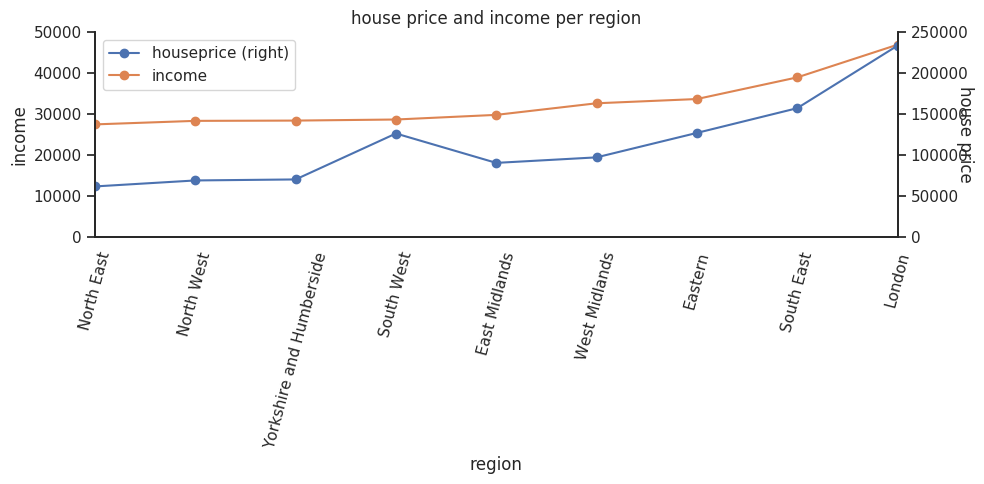

In [4]:
ax = mean_per_group[['houseprice', 'income']].plot(
    secondary_y=['houseprice'], 
    kind='line',
    style='-o',
    figsize=(10,5), 
    rot=75,
)
ax.set(title='house price and income per region', ylabel='income', ylim=(0, 50000))
plt.xticks(ticks=range(len(mean_per_group)), labels=mean_per_group.index)

# add ylabel and ylim for the secondary y-axis houseprice
plt.ylabel('house price', rotation=-90)
plt.ylim((0, 250000))

# make plot nicer
sns.despine(right=False)
plt.tight_layout();

## Standardizing data  

To standardize a variable you apply the following formula to every value:  
$ z_{i1} = \dfrac{x_{i1} - \bar{x_1}}{s_1}$ where $s_1$ is the sampling standard deviation of variable $X_1$

There is difference between using pandas or scikit learn to standardize your data.  
Pandas uses 1 degree of freedom (sample sd), while scikit uses 0 degrees of freedom (population sd).

### Standardizing the pandas way  
This uses 1 degree of freedom to calculate the sample sd.

In [5]:
num_columns = ['houseprice', 'income']
df_zscores = (df[num_columns] - df[num_columns].mean()) / df[num_columns].std(ddof=1)
df = df.join(df_zscores, rsuffix='_z')

In [6]:
df.head(3)

region                  authority  houseprice    income  \
0  East Midlands  Amber Valley                84828.000 28509.000   
1  East Midlands  Bolsover                    72854.000 23322.000   
2  East Midlands  Chesterfield                92295.000 28409.000   

   houseprice_z  income_z  
0        -0.588    -0.547  
1        -0.783    -1.124  
2        -0.467    -0.558

### Standardizing the sklearn way

If you use scikit learn to scale / standardize your data, this uses 0 degrees of freedom for the standard deviation (= population sd), so this gives different results.  
Technically this is wrong, but if you're using it for machine learning, it probably won't affect your final machine learning model. 

In [7]:
from sklearn.preprocessing import scale
scale(df[num_columns], with_mean=True, with_std=True)[0:3]

array([[-0.58927069, -0.54774532],
       [-0.78404585, -1.12548563],
       [-0.46780867, -0.55888356]])

### Plotting the standardized values  
There are some clear outliers :)  
Interactivity with plotly is nice, but still quite verbose...

In [8]:
import plotly.graph_objs as go

fig = go.FigureWidget(
    data=[
        {
            'x': df[df.region == region]['income_z'],
            'y': df[df.region == region]['houseprice_z'],
            'name': region,
            'text': df[df.region == region]['authority'],
            'hoverinfo': 'x+y+text+name',
            'mode': 'markers',
            'type': 'scatter',
        } for region in df.region.unique().tolist()
    ], 
    layout={
        'title': 'Relationship standardized income and household',
        'xaxis': {'range': [-2, 9], 'title': 'income_z'},
        'yaxis': {'range': [-2, 9], 'title': 'houseprice_z'},
        'width': 1000,  # size of plot
        'height': 500,  # size of plot
        'hovermode': 'closest',
    }
)
fig

FigureWidget({
    'data': [{'hoverinfo': 'x+y+text+name',
              'mode': 'markers',
              'namâ€¦

## Calculate correlation matrix

#### Reading the data

In [9]:
df_math = pd.read_csv(
    './data/mathsability.csv', 
    header=0, 
    usecols=['age', 'geometry', 'arithmetic', 'algebra'],
)
df_math.head(3)

age  geometry  arithmetic  algebra
0 16.250    55.000      49.000   41.000
1 15.417    48.000      93.000   79.000
2 14.917    85.000      65.000   62.000

#### Checking the ranges of the data with a boxplot

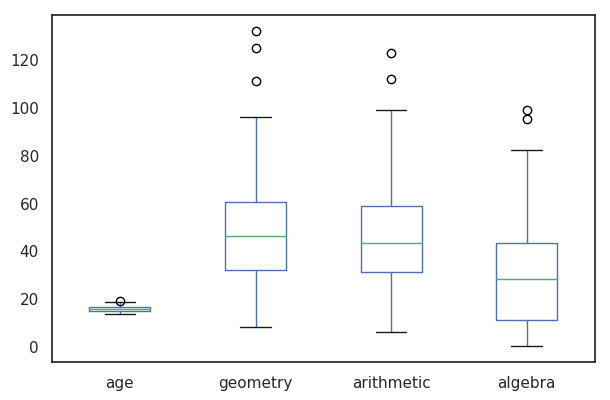

In [10]:
df_math.plot(kind='box');

#### Calculating covariance matrix with numpy cov

In [11]:
numpy_cov_matrix = np.cov(df_math, rowvar=False)
cov_matrix = pd.DataFrame(
    numpy_cov_matrix, 
    columns=df_math.columns, 
    index=df_math.columns
)
cov_matrix

age  geometry  arithmetic  algebra
age        1.456     3.030       0.049    4.812
geometry   3.030   637.597     330.666  327.306
arithmetic 0.049   330.666     588.932  383.768
algebra    4.812   327.306     383.768  559.712

#### Calculating correlation matrix with pandas
Nice and easy

In [12]:
df_math.corr()

age  geometry  arithmetic  algebra
age        1.000     0.099       0.002    0.169
geometry   0.099     1.000       0.540    0.548
arithmetic 0.002     0.540       1.000    0.668
algebra    0.169     0.548       0.668    1.000

#### P-values for your correlations  
Unfortunately I have to write my own custom function to get an overview of all p-values

In [13]:
from scipy.stats import pearsonr

In [14]:
columns = df_math.columns
size_needed = columns.size
corr_matrix = np.zeros((size_needed, size_needed))
pvalues_matrix = np.zeros((size_needed, size_needed))

# calculate for every combination of 2 columns the correlation with scipy.stats.pearsonr, 
# so you also right away get the pvalue of the correlation
# this looks bad, because it's not vectorized
for row_nr in range(size_needed):
    for col_nr in range(size_needed):
        if row_nr != col_nr:
            correlation, pvalue = pearsonr(
                df_math.iloc[:, row_nr], 
                df_math.iloc[:, col_nr]
            )
            corr_matrix[row_nr][col_nr] = correlation
            pvalues_matrix[row_nr][col_nr] = pvalue
        elif row_nr == col_nr:
            corr_matrix[row_nr][col_nr] = 0
            pvalues_matrix[row_nr][col_nr] = 0
        
corr_df = pd.DataFrame(np.round(corr_matrix, decimals=3), index=columns, columns=columns)
pvalues_df = pd.DataFrame(np.round(pvalues_matrix, decimals=3), index=columns, columns=columns)

### Visualizing correlation matrix

#### Pandas way of heatmap: .style.background_gradient()

I really like the pandas way of visualizing the dataframe.  
It's not a graph, it's just background coloring.  
Nice thing is, with axis=0, axis=1, or axis=None, you can control if the background coloring is determined over row, column or the whole dataframe.  
Check out StackOverflow on this topic: [Stackoverflow correlation matrix][so]  


[so]:https://stackoverflow.com/questions/29432629/correlation-matrix-using-pandas

In [15]:
# axis=None takes care that the color gradient is calculated over 
# the values in the whole frame, not per row or per column only
corr_df.style.background_gradient(cmap='coolwarm', axis=None)

In [16]:
# visualizing the pvalues
pvalues_df.style.background_gradient(cmap='coolwarm', axis=None)

#### Seaborn heatmap
This feels the easiest, code is easier to remember.

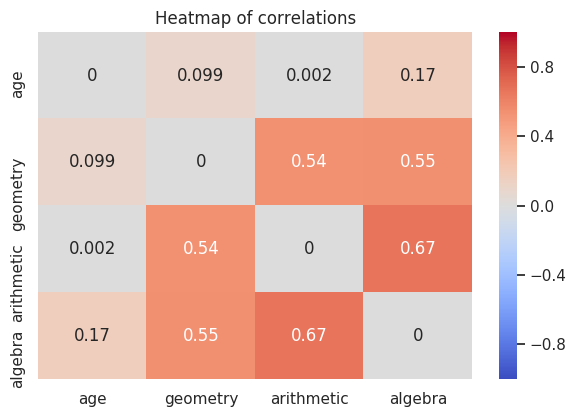

In [17]:
ax = sns.heatmap(corr_df, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
ax.set(title='Heatmap of correlations');

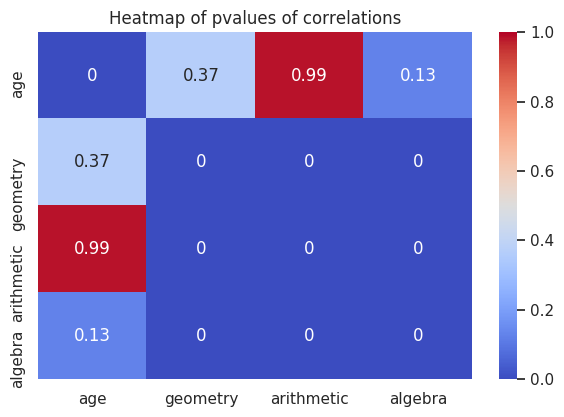

In [18]:
ax = sns.heatmap(pvalues_df, cmap='coolwarm', annot=True, vmin=0, vmax=1)
ax.set(title='Heatmap of pvalues of correlations');